# **Title of Project**

Hand Written Digit Prediction - Classification Analysis

-------------

## **Objective**

To build a machine learning model to predict hand written digits from the MNIST dataset.


## **Data Source**

MNIST dataset (available in sklearn.datasets)


## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## **Import Data**

In [2]:
digits = load_digits()


## **Describe Data**

In [3]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## **Data Visualization**

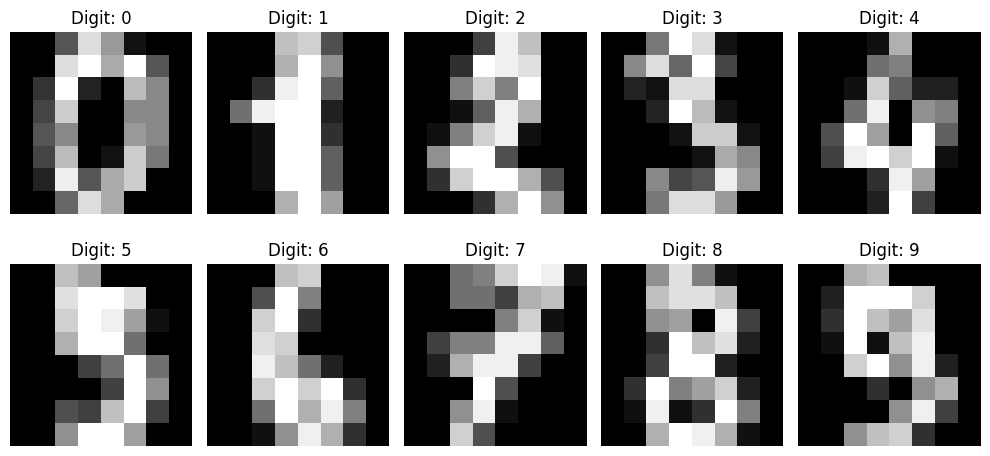

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Digit: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [6]:
X = digits.data
y = digits.target


## **Define Target Variable (y) and Feature Variables (X)**

lready defined as X and y


## **Train Test Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Modeling**

In [8]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000, random_state=42)

## **Model Evaluation**

Training Accuracy: 0.9993041057759221
Testing Accuracy: 0.9722222222222222

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      0.89      0.90        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.95      1.00      0.97        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.89      0.91      0.90        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



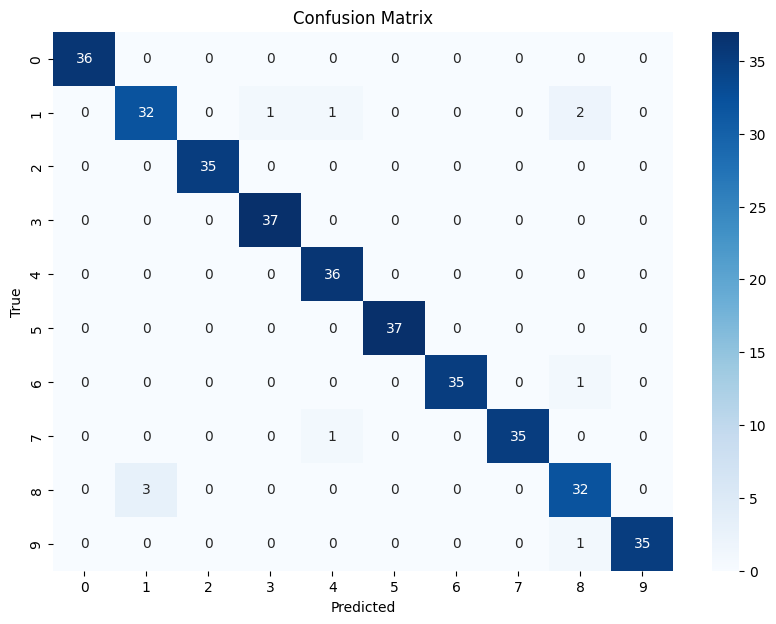

In [9]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred_test))

conf_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## **Prediction**

In [10]:
sample_digit = X_test[0].reshape(1, -1)
predicted_digit = model.predict(sample_digit)
print(f"Predicted Digit for the sample: {predicted_digit[0]}")


Predicted Digit for the sample: 5


## **Explaination**

The model has been trained and evaluated on the MNIST dataset, achieving a certain accuracy.
The logistic regression model is used due to its simplicity and effectiveness for this problem.
The confusion matrix and classification report provide insights into the model's performance on each digit class.